In [150]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sms
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('../data/King_County_House_prices_dataset.csv')
df['date'] = pd.to_datetime(df.sort_values(by=['date'], ascending=False)['date'])

In [141]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

(None,
                  id         price      bedrooms     bathrooms   sqft_living  \
 count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
 mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
 std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
 min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
 25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
 50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
 75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
 max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   
 
            sqft_lot        floors    waterfront          view     condition  \
 count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
 mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
 std    4.141264e+04      0.539

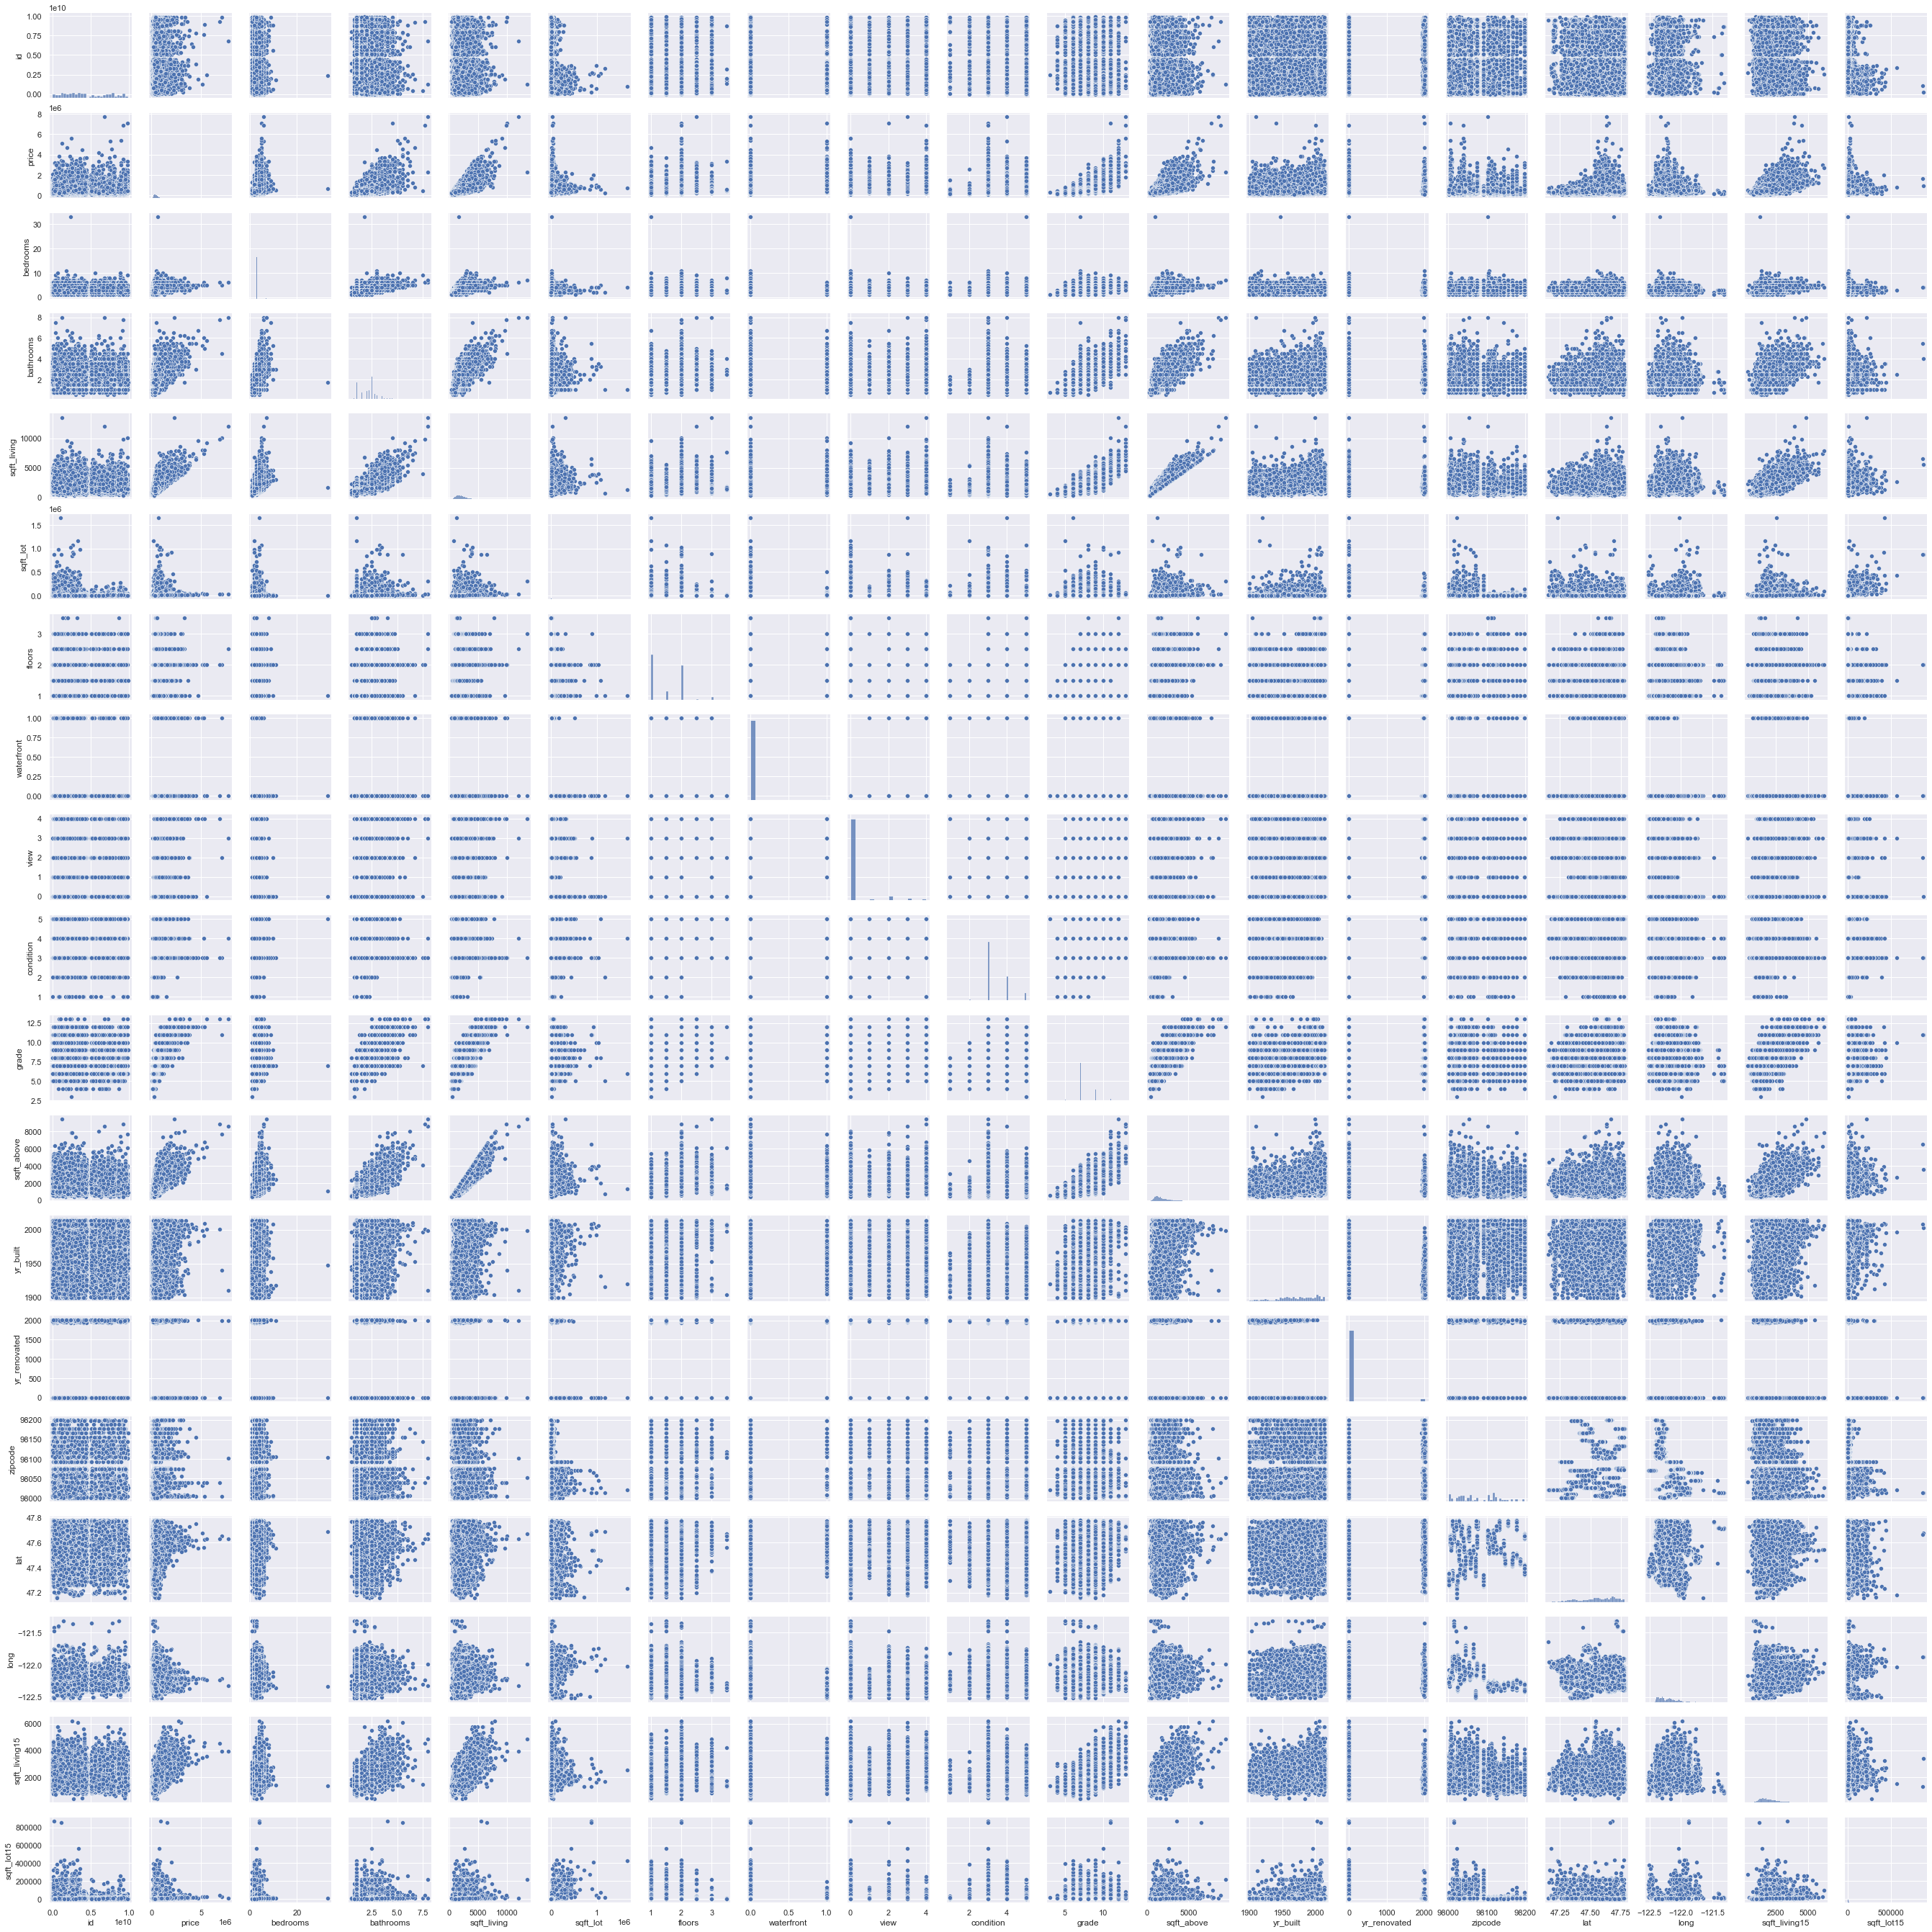

In [30]:
sns.pairplot(df, height=2)

In [31]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

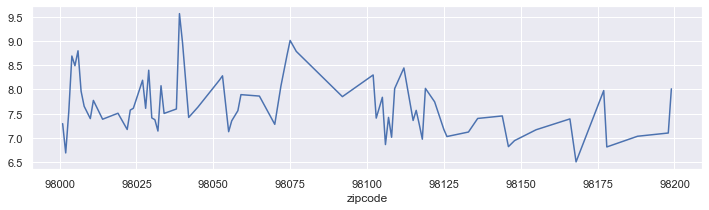

In [107]:
df.groupby('zipcode').mean()['grade'].plot(figsize=[12,3]);

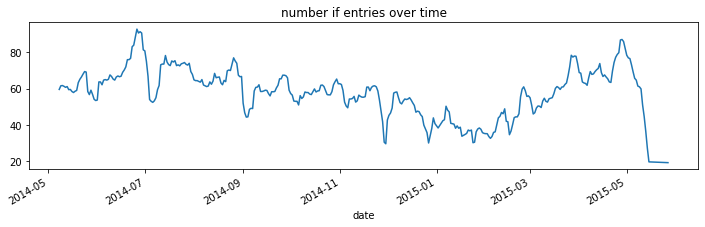

In [4]:
df.groupby('date')['id'].count().rolling(7).mean().plot(figsize=[12,3])
plt.title('number of entries over time');
    


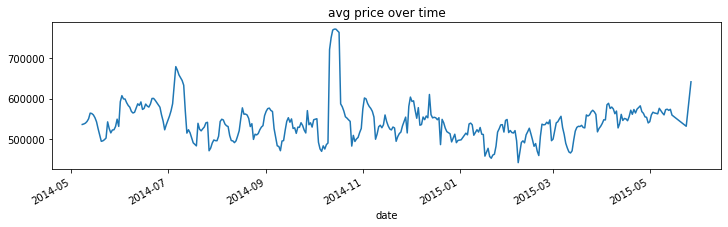

In [5]:
df.groupby('date')['price'].mean().rolling(7).mean().plot(figsize=[12,3])
plt.title('avg price over time');

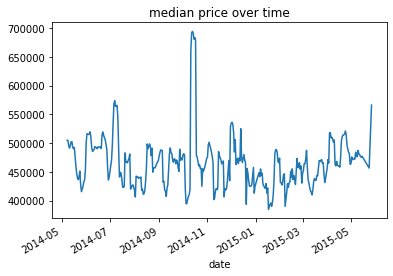

In [6]:
df.groupby('date')['price'].median().rolling(7).mean().plot()
plt.title('median price over time');

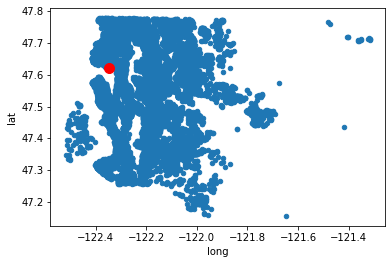

In [15]:
seattle_coord = {}
seattle_coord['lat'] = 47.6204
seattle_coord['long'] = -122.3491
df.plot(kind='scatter', x= 'long', y='lat')
plt.scatter(seattle_coord['long'], seattle_coord['lat'], s=100, c='red')

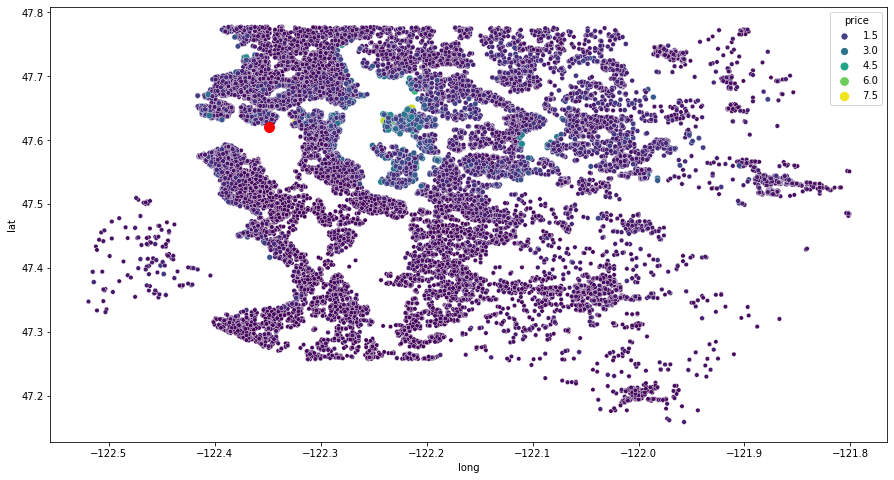

In [22]:
plt.figure(figsize=(15,8))
dfnew = df.query('long < -121.8')
sns.scatterplot(x='long', y='lat', data=dfnew, hue=(df['price']), size='price', palette = 'viridis')
plt.scatter(seattle_coord['long'], seattle_coord['lat'], s=100, c='red')

In [23]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [145]:
cheapest_zipcodes = df.groupby('zipcode').mean()['price'].sort_values()[:20].reset_index(name='avg_price')

In [146]:
cheapest_zipcodes

,zipcode,avg_price
0,98002,234284.035176
1,98168,240328.371747
2,98032,251296.240000
3,98001,281194.869806
4,98148,284908.596491
5,98023,286742.811623
6,98188,289078.345588
7,98003,294111.278571
8,98030,296187.980469
9,98031,300340.402930


In [43]:
df['zipcode'].nunique()

70

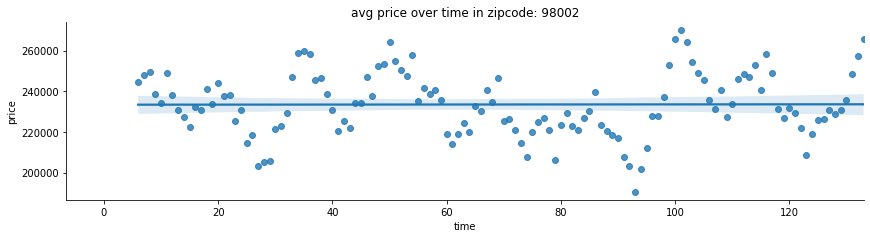

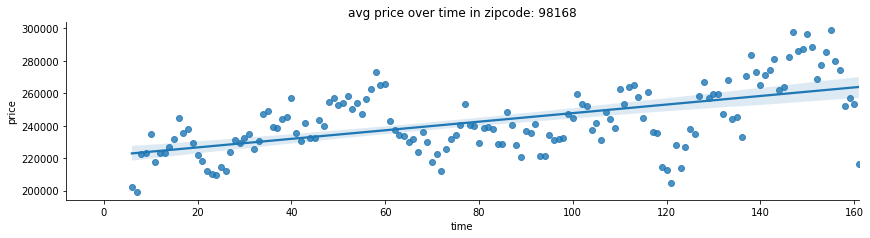

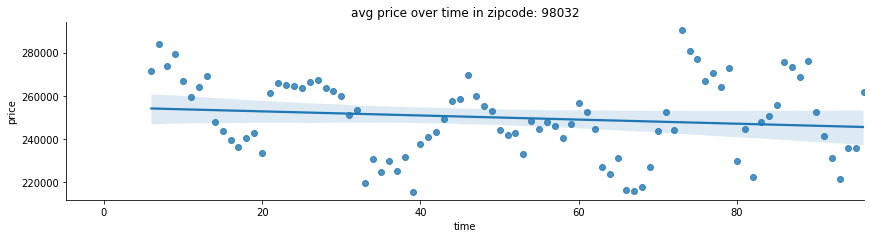

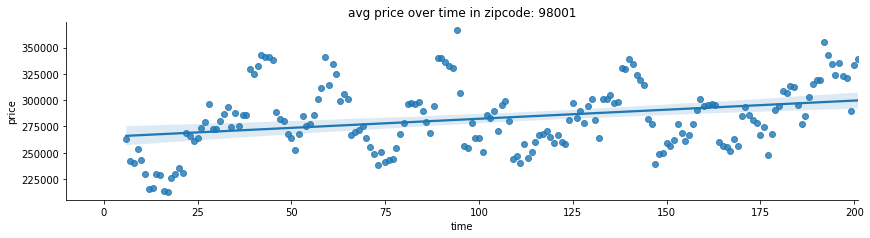

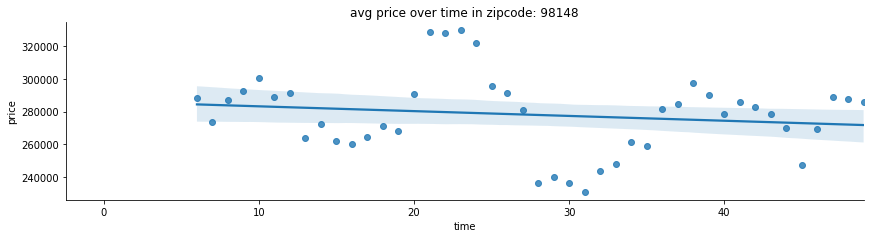

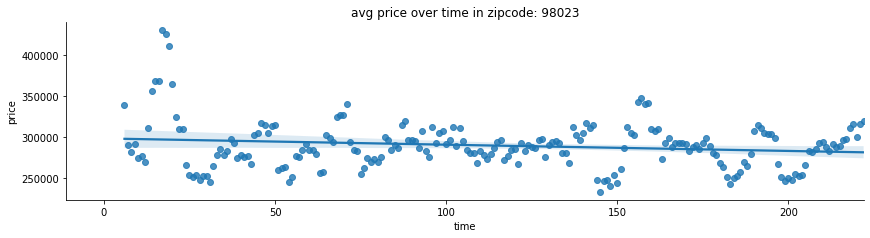

In [149]:
for zipcode in cheapest_zipcodes['zipcode'][:6]:
    zipdata = df[df['zipcode']==zipcode].groupby('date')['price'].mean().rolling(7).mean().reset_index().reset_index()
    sns.lmplot(x='index', y='price', data=zipdata, height=3, aspect=4)
    plt.xlabel('time')
    plt.title(f"avg price over time in zipcode: {zipcode}")
    #zipdata.plot(figsize=[18,5])

In [290]:
fitparamdict, results = {}, {}
for zipcode in cheapest_zipcodes['zipcode'][:20]:
    zipdata = df[df['zipcode']==zipcode].groupby('date')['price'].mean()
    zipdata = pd.DataFrame(zipdata)
    zipdata['jdate'] = zipdata.index.to_julian_date()
    x = sms.add_constant(zipdata['jdate'])
    model = sms.OLS(zipdata['price'], x)
    results[zipcode] = model.fit()
    fitparamdict[zipcode] = results[zipcode].params[1]
    
    
def find_top_n_growth_zips(paramdict, n):
    sorted_dict = dict(sorted(paramdict.items(), key=lambda price: price[1], reverse = True))
    return list(sorted_dict.keys())[:n]
    
best_zips = find_top_n_growth_zips(fitparamdict, n=4)
best_zips

[98168, 98178, 98001, 98106]

In [292]:
for zipcode in best_zips:

    def predict_price_increase(results, zipcode, years_in_future):
        current_value = results[zipcode].predict([1, zipdata['jdate'][-1]])
        future_value = results[zipcode].predict([1, zipdata['jdate'][-1]+360*years_in_future])
        return future_value/current_value

    for year in [3,8]:
        price_increase = predict_price_increase(results, zipcode, year)
        print(f'Based on linear extrapolation, the house price in zipcode {zipcode} will have increased by {int(price_increase*100)-100} % in {year} years.')

Based on linear extrapolation, the house price in zipcode 98168 will have increased by 42 % in 3 years.
Based on linear extrapolation, the house price in zipcode 98168 will have increased by 113 % in 8 years.
Based on linear extrapolation, the house price in zipcode 98178 will have increased by 34 % in 3 years.
Based on linear extrapolation, the house price in zipcode 98178 will have increased by 91 % in 8 years.
Based on linear extrapolation, the house price in zipcode 98001 will have increased by 36 % in 3 years.
Based on linear extrapolation, the house price in zipcode 98001 will have increased by 96 % in 8 years.
Based on linear extrapolation, the house price in zipcode 98106 will have increased by 26 % in 3 years.
Based on linear extrapolation, the house price in zipcode 98106 will have increased by 71 % in 8 years.


In [299]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [483]:
columns_to_compare = [col for col in df.columns if col not in ['price', 'id', 'date', 'waterfront', 'view', 'zipcode', 'lat', 'long', 'sqft_basement', 'yr_renovated']]
tempdict = {}
for col in columns_to_compare:    
    citymedian = df[col].median()
    zipmedian = df[df['zipcode'] == zipcode][col].median()
    citymean = df[col].mean()
    zipmean = df[df['zipcode'] == zipcode][col].mean()
    tempdict[col] = zipmedian/citymedian if citymedian != 0 else 0


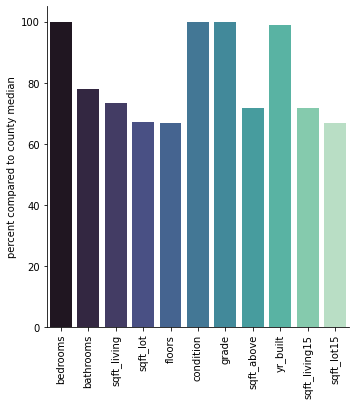

In [490]:
dfcomp= pd.DataFrame.from_dict(tempdict, orient='index')
fig = sns.catplot(data=dfcomp.T*100, kind='bar', palette='mako')
fig.set_xticklabels(rotation=90)
fig.set(ylabel='percent compared to county median')

In [131]:
zipcode = 98168
#zipcode = 98001
dfzip = df.query(f'zipcode == {zipcode}')
avggrade = df['grade'].mean()
avgcond = df['condition'].mean()
zipcond = dfzip['condition'].mean()
zipgrade = dfzip['grade'].mean()
zipyr = dfzip['yr_built'].median()
avgyr = df['yr_built'].median()
zipyrreno = dfzip['yr_renovated'].median()
avgyrreno = df['yr_renovated'].median()
print(f'grade (all/zip): {np.round(avggrade,2)}/{np.round(zipgrade,2)}, cond (all/zip): {np.round(avgcond,2)}/{np.round(zipcond,2)}, yr_build (all/zip): {np.round(avgyr,2)}/{np.round(zipyr,2)}, yr_renovated (all/zip): {np.round(avgyrreno,2)}/{np.round(zipyrreno,2)}')

grade (all/zip): 7.66/6.51, cond (all/zip): 3.41/3.25, yr_build (all/zip): 1975.0/1950.0, yr_renovated (all/zip): 0.0/0.0


<AxesSubplot:xlabel='date'>

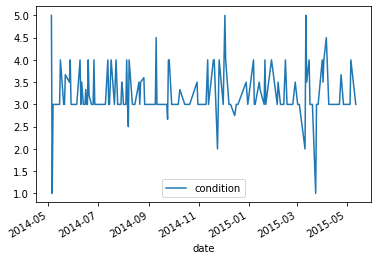

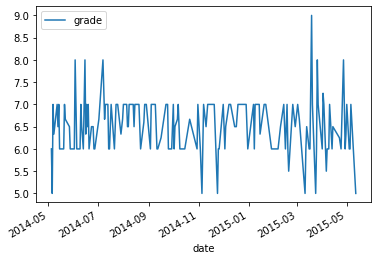

In [129]:
zipcond = dfzip.groupby('date')['condition'].mean().reset_index().reset_index()
zipgrade = dfzip.groupby('date')['grade'].mean().reset_index().reset_index()
zipcond.plot(x='date', y='condition')
zipgrade.plot(x='date', y='grade')

<AxesSubplot:ylabel='Frequency'>

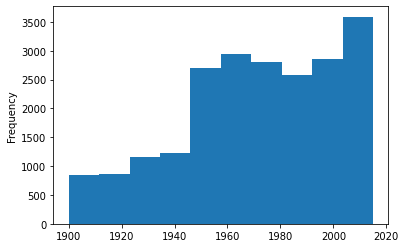

In [134]:
df['yr_built'].plot(kind='hist')

In [138]:
df['sqft_lot15'].median(), dfzip['sqft_lot15'].median()

(7620.0, 9078.0)

In [139]:
df['sqft_living15'].median(), dfzip['sqft_living15'].median()

(1840.0, 1430.0)

In [147]:
correlationmatrix = df.corr()
correlationmatrix.style.bar(align='zero', color=['#d65f5f', '#5fba7d'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
